In [1]:
from sklearn.datasets import fetch_covtype

# Fetch the Covertype dataset
X,y = fetch_covtype(return_X_y=True,as_frame=True)

In [2]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
y.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int32

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [5]:
X.shape

(581012, 54)

In [6]:
y.shape

(581012,)

In [7]:
# Applying Standard scaling for X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X) 

X= scaled_data
X

array([[-1.29780509, -0.93515698, -1.48281978, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-1.31923485, -0.89047967, -1.61636259, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-0.5549068 , -0.14883628, -0.68156292, ..., -0.16595612,
        -0.15601398, -0.12365355],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-2.05498988,  0.12816306,  0.11969395, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-2.05856151,  0.08348575, -0.14739167, ..., -0.16595612,
        -0.15601398, -0.12365355]])

In [8]:
# Applying PCA for dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(X_reduced.shape)

(581012, 2)


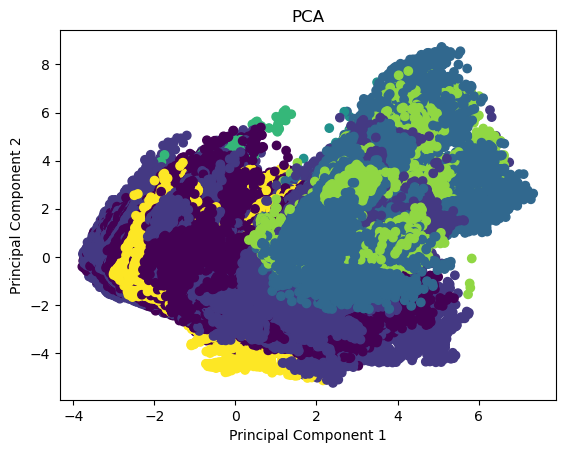

In [9]:
# Plotting reduced data

import matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.title("PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [10]:
X= X_reduced

In [11]:
#Test train data set splitting

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [13]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(348607, 2)
(232405, 2)
(348607,)
(232405,)


In [51]:
#Creating a neural network model 

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 256)               768       
                                                                 
 dense_127 (Dense)           (None, 128)               32896     
                                                                 
 dense_128 (Dense)           (None, 64)                8256      
                                                                 
 dense_129 (Dense)           (None, 8)                 520       
                                                                 
Total params: 42440 (165.78 KB)
Trainable params: 42440 (165.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
10894/10894 [==============================] - 39s 3ms/step - loss: 0.9191 - accuracy: 0.5676 - val_loss: 0.9098 - val_accuracy: 0.5660
Epoch 2/10
10894/10894 [==============================] - 46s 4ms/step - loss: 0.9037 - accuracy: 0.5757 - val_loss: 0.9015 - val_accuracy: 0.5761
Epoch 3/10
10894/10894 [==============================] - 41s 4ms/step - loss: 0.8994 - accuracy: 0.5781 - val_loss: 0.8997 - val_accuracy: 0.5783
Epoch 4/10
10894/10894 [==============================] - 37s 3ms/step - loss: 0.8974 - accuracy: 0.5791 - val_loss: 0.9000 - val_accuracy: 0.5796
Epoch 5/10
10894/10894 [==============================] - 40s 4ms/step - loss: 0.8958 - accuracy: 0.5796 - val_loss: 0.8978 - val_accuracy: 0.5805
Epoch 6/10
10894/10894 [==============================] - 38s 3ms/step - loss: 0.8950 - accuracy: 0.5804 - val_loss: 0.8978 - val_accuracy: 0.5810
Epoch 7/10
10894/10894 [==============================] - 43s 4ms/step - loss: 0.8940 - accuracy: 0.5807 - val_loss: 0

In [188]:
# Evaluating the model on test data

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.8899781703948975
Test accuracy: 0.583184540271759
